In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import tensorflow.keras
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.io import wavfile
from scipy import signal
from scipy.signal import find_peaks, peak_prominences
from scipy.io import wavfile
from scipy import signal, interpolate
from scipy.interpolate import splrep, splev
import joblib
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler

# Data load

Lucas = pd.read_csv("C:/Users/user/Desktop/인공지능 CPR/Beat2Beat_Data/Valid_Lucas_Error_Delete_2.csv",dtype = 'float')#1


In [2]:
Lucas.shape

(4727, 25)

In [3]:
Input_Data_Beat2Beat = np.vstack([Lucas])

In [4]:
Input_Data_Beat2Beat.shape

(4727, 25)

In [5]:
len(Input_Data_Beat2Beat)

4727

In [6]:
print(Input_Data_Beat2Beat.shape)

(4727, 25)


In [7]:
Total_Input_signal = Input_Data_Beat2Beat

In [8]:
print(Total_Input_signal.shape)

(4727, 25)


In [9]:
print("Depth: Max= ",max(Total_Input_signal[:,0]),"Min = ",min(Total_Input_signal[:,0]))
print("Rate: Max= ",max(Total_Input_signal[:,1]),"Min = ",min(Total_Input_signal[:,1]))
print("ABP Systolic: Max= ",max(Total_Input_signal[:,2]),"Min = ",min(Total_Input_signal[:,2]))
print("ABP Diastolic: Max= ",max(Total_Input_signal[:,3]),"Min = ",min(Total_Input_signal[:,3]))
print("CVP Systolic: Max= ",max(Total_Input_signal[:,4]),"Min = ",min(Total_Input_signal[:,4]))
print("CVP Diastolic: Max= ",max(Total_Input_signal[:,5]),"Min = ",min(Total_Input_signal[:,5]))
print("PPG Systolic: Max= ",max(Total_Input_signal[:,6]),"Min = ",min(Total_Input_signal[:,6]))
print("PPG Diastolic: Max= ",max(Total_Input_signal[:,7]),"Min = ",min(Total_Input_signal[:,7]))
print("ETCo2: Max= ",max(Total_Input_signal[:,8]),"Min = ",min(Total_Input_signal[:,8]))
print("ITP Peak: Max= ",max(Total_Input_signal[:,9]),"Min = ",min(Total_Input_signal[:,9]))
print("MAP: Max= ",max(Total_Input_signal[:,10]),"Min = ",min(Total_Input_signal[:,10]))
print("ABP Area: Max= ",max(Total_Input_signal[:,11]),"Min = ",min(Total_Input_signal[:,11]))
print("CVP Area: Max= ",max(Total_Input_signal[:,12]),"Min = ",min(Total_Input_signal[:,12]))
print("PPG Area: Max= ",max(Total_Input_signal[:,13]),"Min = ",min(Total_Input_signal[:,13]))
print("Mean ABP: Max= ",max(Total_Input_signal[:,14]),"Min = ",min(Total_Input_signal[:,14]))
print("ABP Difference: Max= ",max(Total_Input_signal[:,15]),"Min = ",min(Total_Input_signal[:,15]))
print("CVP Difference: Max= ",max(Total_Input_signal[:,16]),"Min = ",min(Total_Input_signal[:,16]))
print("PPG Difference: Max= ",max(Total_Input_signal[:,17]),"Min = ",min(Total_Input_signal[:,17]))
print("ABP Time Difference: Max= ",max(Total_Input_signal[:,18]),"Min = ",min(Total_Input_signal[:,18]))
print("CVP Time Difference: Max= ",max(Total_Input_signal[:,19]),"Min = ",min(Total_Input_signal[:,19]))
print("PPG Time Difference: Max= ",max(Total_Input_signal[:,20]),"Min = ",min(Total_Input_signal[:,20]))
print("Coronary Perfusion Pressure1 : Max= ",max(Total_Input_signal[:,21]),"Min = ",min(Total_Input_signal[:,21]))
print("Coronary Perfusion Pressure2: Max= ",max(Total_Input_signal[:,22]),"Min = ",min(Total_Input_signal[:,22]))
print("Coronary Perfusion Pressure3: Max= ",max(Total_Input_signal[:,23]),"Min = ",min(Total_Input_signal[:,23]))
print("Carotid Volume: Max= ",max(Total_Input_signal[:,24]),"Min = ",min(Total_Input_signal[:,24]))

Depth: Max=  5.0 Min =  5.0
Rate: Max=  100.0 Min =  100.0
ABP Systolic: Max=  368.248311825279 Min =  35.4477784200666
ABP Diastolic: Max=  43.148435025594 Min =  -56.9655177067553
CVP Systolic: Max=  357.108375985774 Min =  12.072939693998
CVP Diastolic: Max=  11.201996095897 Min =  -19.8917604137829
PPG Systolic: Max=  0.0361704762680939 Min =  -0.0058188094980577
PPG Diastolic: Max=  0.0488259008230161 Min =  -0.0011867468739715
ETCo2: Max=  42.4294563097724 Min =  5.15407828667294
ITP Peak: Max=  1.97779140246642 Min =  -0.0639515219775661
MAP: Max=  110.68306845908 Min =  10.683075060074
ABP Area: Max=  154.155545929159 Min =  15.2490579019512
CVP Area: Max=  174.729593861127 Min =  8.82147837163213
PPG Area: Max=  0.0014270151115014 Min =  -0.0019276500860247
Mean ABP: Max=  130.099524720997 Min =  13.0141149237101
ABP Difference: Max=  386.347865049299 Min =  35.3469700866599
CVP Difference: Max=  355.316998155374 Min =  18.0190442815001
PPG Difference: Max=  0.0167616409710602

In [10]:
# 0~7 Normalize 필요

def min_max_normalize(lst):
    normalized = []
    
    for value in lst:
        normalized_num = (value - min(lst)) / (max(lst) - min(lst))
        normalized.append(normalized_num)
    
    return normalized

Depth_Feature= np.append(Total_Input_signal[:,0],np.array([6,5]))
Rate_Feature= np.append(Total_Input_signal[:,1],np.array([120,100]))

SABP_Feature= np.append(Total_Input_signal[:,2],np.array([470,10]))
DABP_Feature= np.append(Total_Input_signal[:,3],np.array([60,-60]))

SCVP_Feature= np.append(Total_Input_signal[:,4],np.array([410,10]))
DCVP_Feature= np.append(Total_Input_signal[:,5],np.array([50,-20]))

SPPG_Feature= np.append(Total_Input_signal[:,6],np.array([0.05,-0.01]))
DPPG_Feature= np.append(Total_Input_signal[:,7],np.array([0.05,-0.01]))

ETmax = np.append(Total_Input_signal[:,8],np.array([50,5]))

ITPmax = np.append(Total_Input_signal[:,9],np.array([2,-0.1]))

MAP = np.append(Total_Input_signal[:,10],np.array([130,-10]))

ABP_Area = np.append(Total_Input_signal[:,11],np.array([200,10]))

CVP_Area = np.append(Total_Input_signal[:,12],np.array([200,2.5]))

PPG_Area = np.append(Total_Input_signal[:,13],np.array([2,-2]))

Mean_ABP = np.append(Total_Input_signal[:,14],np.array([140,0.7]))

ABP_Difference = np.append(Total_Input_signal[:,15],np.array([400,20]))

CVP_Difference = np.append(Total_Input_signal[:,16],np.array([420,0]))

PPG_Difference = np.append(Total_Input_signal[:,17],np.array([0.05,-0.1]))

ABP_Time_Difference = np.append(Total_Input_signal[:,18],np.array([3,0]))

CVP_Time_Difference = np.append(Total_Input_signal[:,19],np.array([3,0]))

PPG_Time_Difference = np.append(Total_Input_signal[:,20],np.array([1,0]))

Coronary_Perfusion_Pressure1 = np.append(Total_Input_signal[:,21],np.array([300,-200]))

Coronary_Perfusion_Pressure2 = np.append(Total_Input_signal[:,22],np.array([60,-60]))

Coronary_Perfusion_Pressure3 = np.append(Total_Input_signal[:,23],np.array([150,-40]))

In [11]:
Depth_Feature = np.delete(min_max_normalize(np.array(Depth_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
Rate_Feature = np.delete(min_max_normalize(np.array(Rate_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
SABP_Feature = np.delete(min_max_normalize(np.array(SABP_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
DABP_Feature = np.delete(min_max_normalize(np.array(DABP_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
SCVP_Feature = np.delete(min_max_normalize(np.array(SCVP_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
DCVP_Feature = np.delete(min_max_normalize(np.array(DCVP_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
SPPG_Feature = np.delete(min_max_normalize(np.array(SPPG_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
DPPG_Feature = np.delete(min_max_normalize(np.array(DPPG_Feature)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
ETmax = np.delete(min_max_normalize(np.array(ETmax)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
ITPmax = np.delete(min_max_normalize(np.array(ITPmax)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
MAP = np.delete(min_max_normalize(np.array(MAP)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
ABP_Area = np.delete(min_max_normalize(np.array(ABP_Area)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
CVP_Area = np.delete(min_max_normalize(np.array(CVP_Area)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
PPG_Area = np.delete(min_max_normalize(np.array(PPG_Area)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
Mean_ABP = np.delete(min_max_normalize(np.array(Mean_ABP)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
ABP_Difference = np.delete(min_max_normalize(np.array(ABP_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
CVP_Difference = np.delete(min_max_normalize(np.array(CVP_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
PPG_Difference  = np.delete(min_max_normalize(np.array(PPG_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
ABP_Time_Difference = np.delete(min_max_normalize(np.array(ABP_Time_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
CVP_Time_Difference = np.delete(min_max_normalize(np.array(CVP_Time_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
PPG_Time_Difference = np.delete(min_max_normalize(np.array(PPG_Time_Difference)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
Coronary_Perfusion_Pressure1 = np.delete(min_max_normalize(np.array(Coronary_Perfusion_Pressure1)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
Coronary_Perfusion_Pressure2 = np.delete(min_max_normalize(np.array(Coronary_Perfusion_Pressure2)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))
Coronary_Perfusion_Pressure3 = np.delete(min_max_normalize(np.array(Coronary_Perfusion_Pressure3)),(len(Input_Data_Beat2Beat),len(Input_Data_Beat2Beat)+1))

In [12]:
Total_Input_signal[:,0] = Depth_Feature
Total_Input_signal[:,1] = Rate_Feature 
Total_Input_signal[:,2] = SABP_Feature
Total_Input_signal[:,3] = DABP_Feature
Total_Input_signal[:,4] = SCVP_Feature
Total_Input_signal[:,5] = DCVP_Feature
Total_Input_signal[:,6] = SPPG_Feature
Total_Input_signal[:,7] = DPPG_Feature
Total_Input_signal[:,8] = ETmax
Total_Input_signal[:,9] = ITPmax
Total_Input_signal[:,10] = MAP
Total_Input_signal[:,11] = ABP_Area
Total_Input_signal[:,12] = CVP_Area
Total_Input_signal[:,13] = PPG_Area
Total_Input_signal[:,14] = Mean_ABP
Total_Input_signal[:,15] = ABP_Difference
Total_Input_signal[:,16] = CVP_Difference
Total_Input_signal[:,17] = PPG_Difference
Total_Input_signal[:,18] = ABP_Time_Difference
Total_Input_signal[:,19] = CVP_Time_Difference
Total_Input_signal[:,20] = PPG_Time_Difference
Total_Input_signal[:,21] = Coronary_Perfusion_Pressure1
Total_Input_signal[:,22] = Coronary_Perfusion_Pressure2
Total_Input_signal[:,23] = Coronary_Perfusion_Pressure3

In [13]:
Total_Input_signal = pd.DataFrame(Total_Input_signal)

In [14]:
# Rosc 0 평균 Beat Carotid Volume = 0.99 ml
# Rosc X 평균 Beat Carotid Volume = 0.56 ml
Carotid_data_62 = np.zeros(shape=(len(Total_Input_signal)), dtype =np.int8)
Carotid_data_68 = np.zeros(shape=(len(Total_Input_signal)), dtype =np.int8)
Carotid_data_89 = np.zeros(shape=(len(Total_Input_signal)), dtype =np.int8)
Carotid_data_1 = np.zeros(shape=(len(Total_Input_signal)), dtype =np.int8)



In [16]:
# 0.68
for i in range(0,len(Total_Input_signal)):
    if Total_Input_signal.iloc[i,24] <= 0.6851:
        Carotid_data_68 [i] = 0
    elif Total_Input_signal.iloc[i,24] > 0.6851:
        Carotid_data_68 [i] = 1

In [19]:
Carotid_Threshold_value =[]
Carotid_Threshold_value = np.transpose(np.vstack([Carotid_data_62,Carotid_data_68,Carotid_data_89,Carotid_data_1]))

In [20]:
Total_Input_signal = np.hstack((Total_Input_signal,Carotid_Threshold_value))

In [21]:
Total_Input_signal = pd.DataFrame(Total_Input_signal)

In [22]:
Total_Input_signal = Total_Input_signal.set_axis(['Depth','Rate','SABP','DABP','SCVP','DCVP','SPPG','DPPG','ETpeaks','ITPpeaks','MAP','ABP_Area','CVP_Area','PPG_Area','Mean ABP','ABP Difference','CVP Difference','PPG Difference', 'ABP Time Difference','CVP Time Difference','PPG Time Difference','CPP1','CPP2','CPP3','Carotid Volume','0.62','0.68','0.89','1'],axis = 'columns')

In [23]:
Total_Input_signal

,Depth,Rate,SABP,DABP,SCVP,DCVP,SPPG,DPPG,ETpeaks,ITPpeaks,...,CVP Time Difference,PPG Time Difference,CPP1,CPP2,CPP3,Carotid Volume,0.62,0.68,0.89,1
0,0.0,0.0,0.517805,0.431428,0.633759,0.213226,0.172589,0.178529,0.315266,0.133802,...,0.163667,0.378,0.369374,0.486158,0.242709,4.607660,1.0,1.0,1.0,1.0
1,0.0,0.0,0.519309,0.428999,0.635732,0.213245,0.156359,0.211896,0.315266,0.128295,...,0.163333,0.361,0.369179,0.483775,0.242225,4.544113,1.0,1.0,1.0,1.0
2,0.0,0.0,0.521883,0.430840,0.640206,0.214943,0.175741,0.214243,0.315266,0.123927,...,0.164667,0.197,0.367967,0.484605,0.241928,4.525881,1.0,1.0,1.0,1.0
3,0.0,0.0,0.527984,0.430171,0.647397,0.214132,0.206375,0.191000,0.315266,0.220838,...,0.165000,0.362,0.367827,0.484415,0.242484,4.579202,1.0,1.0,1.0,1.0
4,0.0,0.0,0.524711,0.448128,0.643306,0.250364,0.212921,0.172863,0.305716,0.540942,...,0.165333,0.384,0.368089,0.481311,0.242853,4.615489,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,0.0,0.0,0.405321,0.720855,0.493426,0.301291,0.237774,0.226020,0.331334,0.473879,...,0.167667,0.405,0.378154,0.718584,0.326011,3.863851,1.0,1.0,1.0,1.0
4723,0.0,0.0,0.360221,0.724006,0.450001,0.319569,0.227160,0.222552,0.331334,0.605013,...,0.170333,0.415,0.371402,0.711251,0.323023,3.773584,1.0,1.0,1.0,1.0
4724,0.0,0.0,0.377004,0.735642,0.467945,0.297554,0.209170,0.229322,0.331334,0.185222,...,0.169333,0.408,0.372487,0.735150,0.330498,3.912735,1.0,1.0,1.0,1.0
4725,0.0,0.0,0.393147,0.734227,0.482049,0.284042,0.200880,0.203630,0.331334,0.146878,...,0.172333,0.401,0.376056,0.741464,0.331968,3.854632,1.0,1.0,1.0,1.0


In [24]:
pd.set_option('display.max_columns',None)
Total_Input_signal

,Depth,Rate,SABP,DABP,SCVP,DCVP,SPPG,DPPG,ETpeaks,ITPpeaks,MAP,ABP_Area,CVP_Area,PPG_Area,Mean ABP,ABP Difference,CVP Difference,PPG Difference,ABP Time Difference,CVP Time Difference,PPG Time Difference,CPP1,CPP2,CPP3,Carotid Volume,0.62,0.68,0.89,1
0,0.0,0.0,0.517805,0.431428,0.633759,0.213226,0.172589,0.178529,0.315266,0.133802,0.623174,0.416229,0.454481,0.500085,0.537127,0.622155,0.639471,0.664291,0.163333,0.163667,0.378,0.369374,0.486158,0.242709,4.607660,1.0,1.0,1.0,1.0
1,0.0,0.0,0.519309,0.428999,0.635732,0.213245,0.156359,0.211896,0.315266,0.128295,0.623434,0.419115,0.457754,0.500026,0.541387,0.624743,0.641347,0.644452,0.163667,0.163333,0.361,0.369179,0.483775,0.242225,4.544113,1.0,1.0,1.0,1.0
2,0.0,0.0,0.521883,0.430840,0.640206,0.214943,0.175741,0.214243,0.315266,0.123927,0.627304,0.419194,0.458134,0.499955,0.541483,0.627277,0.645325,0.651266,0.164000,0.164667,0.197,0.367967,0.484605,0.241928,4.525881,1.0,1.0,1.0,1.0
3,0.0,0.0,0.527984,0.430171,0.647397,0.214132,0.206375,0.191000,0.315266,0.220838,0.633604,0.421870,0.460139,0.499927,0.542731,0.634873,0.652309,0.672817,0.164333,0.165000,0.362,0.367827,0.484415,0.242484,4.579202,1.0,1.0,1.0,1.0
4,0.0,0.0,0.524711,0.448128,0.643306,0.250364,0.212921,0.172863,0.305716,0.540942,0.640280,0.422324,0.460197,0.499977,0.544168,0.625241,0.642374,0.682690,0.164000,0.165333,0.384,0.368089,0.481311,0.242853,4.615489,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,0.0,0.0,0.405321,0.720855,0.493426,0.301291,0.237774,0.226020,0.331334,0.473879,0.665364,0.335456,0.291462,0.499985,0.444750,0.394592,0.491143,0.671368,0.153667,0.167667,0.405,0.378154,0.718584,0.326011,3.863851,1.0,1.0,1.0,1.0
4723,0.0,0.0,0.360221,0.724006,0.450001,0.319569,0.227160,0.222552,0.331334,0.605013,0.617769,0.323525,0.283044,0.500020,0.430901,0.339002,0.446740,0.668510,0.155000,0.170333,0.415,0.371402,0.711251,0.323023,3.773584,1.0,1.0,1.0,1.0
4724,0.0,0.0,0.377004,0.735642,0.467945,0.297554,0.209170,0.229322,0.331334,0.185222,0.642799,0.333983,0.285449,0.500001,0.441520,0.355644,0.467498,0.658606,0.155333,0.169333,0.408,0.372487,0.735150,0.330498,3.912735,1.0,1.0,1.0,1.0
4725,0.0,0.0,0.393147,0.734227,0.482049,0.284042,0.200880,0.203630,0.331334,0.146878,0.659672,0.335176,0.285092,0.499984,0.444056,0.375633,0.483183,0.665567,0.152667,0.172333,0.401,0.376056,0.741464,0.331968,3.854632,1.0,1.0,1.0,1.0


In [25]:
Pig1 = Total_Input_signal.iloc[:,26]

In [26]:
Pig1

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
4722    1.0
4723    1.0
4724    1.0
4725    1.0
4726    1.0
Name: 0.68, Length: 4727, dtype: float64

In [27]:
Pig1 = pd.DataFrame(Pig1)

In [28]:
print('Test set(P1): ',np.unique(Pig1,return_counts=True))       # Data 구성 확인 

Test set(P1):  (array([0., 1.]), array([ 300, 4427], dtype=int64))


In [29]:
External_Test_X = Total_Input_signal.iloc[:,0:24]
External_Test_Y = Pig1
Answer_0907 = np.array(Pig1)

In [30]:
External_Test_X

,Depth,Rate,SABP,DABP,SCVP,DCVP,SPPG,DPPG,ETpeaks,ITPpeaks,MAP,ABP_Area,CVP_Area,PPG_Area,Mean ABP,ABP Difference,CVP Difference,PPG Difference,ABP Time Difference,CVP Time Difference,PPG Time Difference,CPP1,CPP2,CPP3
0,0.0,0.0,0.517805,0.431428,0.633759,0.213226,0.172589,0.178529,0.315266,0.133802,0.623174,0.416229,0.454481,0.500085,0.537127,0.622155,0.639471,0.664291,0.163333,0.163667,0.378,0.369374,0.486158,0.242709
1,0.0,0.0,0.519309,0.428999,0.635732,0.213245,0.156359,0.211896,0.315266,0.128295,0.623434,0.419115,0.457754,0.500026,0.541387,0.624743,0.641347,0.644452,0.163667,0.163333,0.361,0.369179,0.483775,0.242225
2,0.0,0.0,0.521883,0.430840,0.640206,0.214943,0.175741,0.214243,0.315266,0.123927,0.627304,0.419194,0.458134,0.499955,0.541483,0.627277,0.645325,0.651266,0.164000,0.164667,0.197,0.367967,0.484605,0.241928
3,0.0,0.0,0.527984,0.430171,0.647397,0.214132,0.206375,0.191000,0.315266,0.220838,0.633604,0.421870,0.460139,0.499927,0.542731,0.634873,0.652309,0.672817,0.164333,0.165000,0.362,0.367827,0.484415,0.242484
4,0.0,0.0,0.524711,0.448128,0.643306,0.250364,0.212921,0.172863,0.305716,0.540942,0.640280,0.422324,0.460197,0.499977,0.544168,0.625241,0.642374,0.682690,0.164000,0.165333,0.384,0.368089,0.481311,0.242853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4722,0.0,0.0,0.405321,0.720855,0.493426,0.301291,0.237774,0.226020,0.331334,0.473879,0.665364,0.335456,0.291462,0.499985,0.444750,0.394592,0.491143,0.671368,0.153667,0.167667,0.405,0.378154,0.718584,0.326011
4723,0.0,0.0,0.360221,0.724006,0.450001,0.319569,0.227160,0.222552,0.331334,0.605013,0.617769,0.323525,0.283044,0.500020,0.430901,0.339002,0.446740,0.668510,0.155000,0.170333,0.415,0.371402,0.711251,0.323023
4724,0.0,0.0,0.377004,0.735642,0.467945,0.297554,0.209170,0.229322,0.331334,0.185222,0.642799,0.333983,0.285449,0.500001,0.441520,0.355644,0.467498,0.658606,0.155333,0.169333,0.408,0.372487,0.735150,0.330498
4725,0.0,0.0,0.393147,0.734227,0.482049,0.284042,0.200880,0.203630,0.331334,0.146878,0.659672,0.335176,0.285092,0.499984,0.444056,0.375633,0.483183,0.665567,0.152667,0.172333,0.401,0.376056,0.741464,0.331968


In [31]:
print(External_Test_X.shape)
print(External_Test_Y.shape)

(4727, 24)
(4727, 1)


In [32]:
print('####### Data  #######')
print('External Test set: ',np.unique(External_Test_Y,return_counts=True))       # Data 구성 확인 

####### Data  #######
External Test set:  (array([0., 1.]), array([ 300, 4427], dtype=int64))


In [33]:
# Model 읽기
import sklearn.externals
import joblib
model = joblib.load('CarotidVolume_Classification_KNN_Binary_AddRobot_Range_0.68.pkl')

In [34]:
model

KNeighborsClassifier(metric='manhattan', n_neighbors=6, weights='distance')

In [35]:
# Model 불러오기
prediction = model.predict_proba(External_Test_X)

C:\Users\user\anaconda3\envs\jun\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [36]:
prediction[:,1]

array([1., 1., 1., ..., 1., 1., 1.])

In [37]:
# Best Threshold

# 0.5159553111845486  - 0.68

y_preds = [1 if x>0.5159553111845486  else 0 for x in prediction[:,1]]
print(y_preds[:10])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [38]:
Answer_0907

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [39]:
np.transpose(np.array(Answer_0907))

array([[1., 1., 1., ..., 1., 1., 1.]])

In [40]:
prediction  = y_preds

In [41]:
Answer_Data_0907_phase2_real = Answer_0907
prediction_real = prediction

In [42]:
print('####### Data  #######')
print('External Test set: ',np.unique(Answer_Data_0907_phase2_real,return_counts=True))       # Data 구성 확인 

####### Data  #######
External Test set:  (array([0., 1.]), array([ 300, 4427], dtype=int64))


In [43]:
Answer_Data_0907_phase2_real

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

def get_CarotidModel_eval(y_real, prediction):
    confusion = confusion_matrix(y_real,prediction)
    accuracy = accuracy_score(y_real,prediction)
    precision = precision_score(y_real,prediction,average='weighted')
    recall = recall_score(y_real,prediction,average='weighted')
    print(classification_report(y_real, prediction))
    print('Confusion Matrix')
    print(confusion)
    print('정확도:{}, 정밀도:{}, 재현율:{}'.format(accuracy, precision, recall))
    print('F1_Score: ', 2*(precision*recall)/(precision+recall))

In [45]:
# Carotid Only result
print(get_CarotidModel_eval(Answer_Data_0907_phase2_real,prediction_real))

confusion = confusion_matrix(Answer_Data_0907_phase2_real,prediction_real)


              precision    recall  f1-score   support

         0.0       0.57      0.14      0.22       300
         1.0       0.94      0.99      0.97      4427

    accuracy                           0.94      4727
   macro avg       0.76      0.56      0.59      4727
weighted avg       0.92      0.94      0.92      4727

Confusion Matrix
[[  41  259]
 [  31 4396]]
정확도:0.9386503067484663, 정밀도:0.9205667543090855, 재현율:0.9386503067484663
F1_Score:  0.9295205862871708
None


Text(29.0, 0.5, 'True')

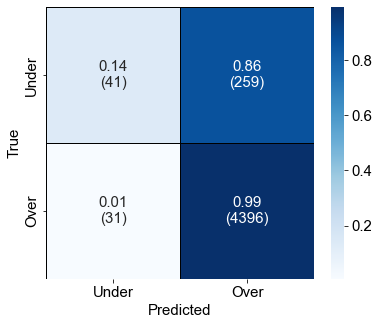

In [46]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns


# 폰트 설정을 먼저 적용
plt.rc('font', family='Arial', size=15)        
plt.rc('axes', labelsize=15)   
plt.rc('xtick', labelsize=15)  
plt.rc('ytick', labelsize=15)

# 실제 Confusion Matrix (count 기준)
conf_matrix_counts = confusion_matrix(Answer_Data_0907_phase2_real, prediction_real, labels=[0, 1])

# Normalized Confusion Matrix
conf_matrix_normalized = confusion_matrix(Answer_Data_0907_phase2_real, prediction_real, labels=[0, 1], normalize='true')

# 주석(annotation)에 퍼센트 + count 추가
labels = np.array([
    [f"{conf_matrix_normalized[i, j]:.2f}\n({conf_matrix_counts[i, j]})" for j in range(2)]
    for i in range(2)
])

# 사용자 정의 레이블 (숫자 대신 'Under', 'Over' 사용)
class_names = ['Under', 'Over']

# 시각화
plt.figure(figsize=(6, 5))  # 그래프 크기 설정
sns.heatmap(conf_matrix_normalized, annot=labels, fmt="", cmap='Blues', linewidths=0.5, linecolor='black',
            xticklabels=class_names, yticklabels=class_names) 

plt.xlabel('Predicted')
plt.ylabel('True')
#plt.title('Normalized Confusion Matrix with Sample Counts')

#plt.savefig("KNN_TotalConfusionMatrix_arial.tiff", dpi=600, bbox_inches='tight')

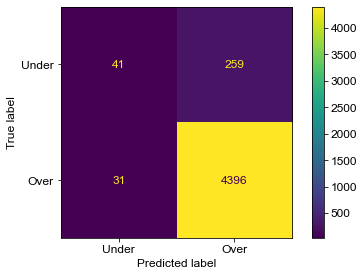

In [47]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

label = ['Under', 'Over']


confusion = confusion_matrix(Answer_Data_0907_phase2_real,prediction_real)

disp = ConfusionMatrixDisplay(confusion_matrix = confusion,
                              display_labels = label
                             )
plt.rc('font',family='arial', size=12)        # 기본 폰트 크기
plt.rc('axes', labelsize=12)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=12)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=12)  # y축 눈금 폰트 크기
disp.plot()

plt.tight_layout()  # 레이아웃 조정
#plt.savefig("KNN_TotalConfusionMatrix_arial.tiff", dpi=600, bbox_inches='tight')
plt.show()  # 플롯을 화면에 표시


In [48]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(Answer_Data_0907_phase2_real,prediction_real)))

print('Micro Precision: {:.2f}'.format(precision_score(Answer_Data_0907_phase2_real,prediction_real, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(Answer_Data_0907_phase2_real,prediction_real, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(Answer_Data_0907_phase2_real,prediction_real, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(Answer_Data_0907_phase2_real,prediction_real, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(Answer_Data_0907_phase2_real,prediction_real, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(Answer_Data_0907_phase2_real,prediction_real, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(Answer_Data_0907_phase2_real,prediction_real, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(Answer_Data_0907_phase2_real,prediction_real, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(Answer_Data_0907_phase2_real,prediction_real, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(Answer_Data_0907_phase2_real,prediction_real, target_names = ['Under','Over']))


Accuracy: 0.94

Micro Precision: 0.94
Micro Recall: 0.94
Micro F1-score: 0.94

Macro Precision: 0.76
Macro Recall: 0.56
Macro F1-score: 0.59

Weighted Precision: 0.92
Weighted Recall: 0.94
Weighted F1-score: 0.92

Classification Report

              precision    recall  f1-score   support

       Under       0.57      0.14      0.22       300
        Over       0.94      0.99      0.97      4427

    accuracy                           0.94      4727
   macro avg       0.76      0.56      0.59      4727
weighted avg       0.92      0.94      0.92      4727



In [49]:
fprs1,tprs1,thresholds1 = roc_curve(Answer_Data_0907_phase2_real, model.predict_proba(External_Test_X)[:,1])

C:\Users\user\anaconda3\envs\jun\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [50]:
print('Roc AUC Curve {}'.format(roc_auc_score(Answer_Data_0907_phase2_real,prediction_real)))

Roc AUC Curve 0.5648320909570063


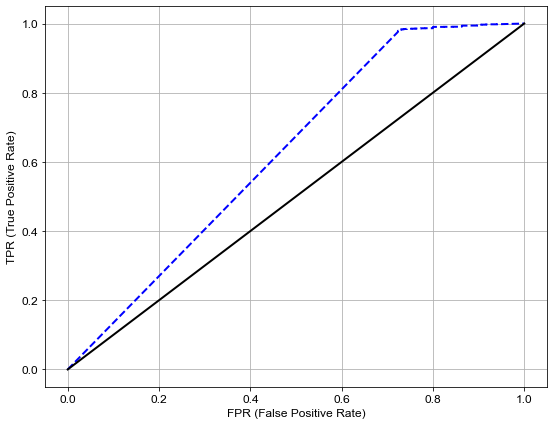

In [51]:
plt.figure(figsize=(9,7))
plt.plot(fprs1, tprs1, color='blue', linestyle='--', lw=2)
plt.plot([0, 1], [0, 1], color='black', lw=2)
plt.xlabel('FPR (False Positive Rate)')
plt.ylabel('TPR (True Positive Rate)')
#plt.legend(loc='lower right')
plt.grid()

plt.rc('font',family='arial', size=25)         # 기본 폰트 크기
plt.rc('axes', labelsize=25)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=25)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=25)  # y축 눈금 폰트 크기
#plt.rc('legend', fontsize=20)  # 범례 폰트 크기
#plt.rc('figure', titlesize=25) # figure title 폰트 크기

plt.savefig("KNN_TotalRocCurve25.tiff", dpi=300)